# Machine Learning Project
## Chihuahuas or Muffins image classifier

### Author: Guglielmo Berzano
#### email: guglielmo.berzano@studenti.unimi.it
#### Academic year: 2023-2024


Importing the libraries:

In [1]:
#connecting to the drive
from google.colab import drive
drive.mount("/content/drive")

#!pip install keras_tuner


#importing the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras import activations, layers, optimizers, losses, regularizers
import pandas as pd
import random
import pickle
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
# import keras_tuner as kt
from tensorflow import random as tf_random
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import metrics
import seaborn as sns

from sklearn.metrics import zero_one_loss
from sklearn.model_selection import KFold, cross_val_score

#importing the data
pickle_in = open( "/content/drive/MyDrive/ML project/"+"X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open( "/content/drive/MyDrive/ML project/"+"y_train.pickle","rb")
y_train = pickle.load(pickle_in)


pickle_in = open( "/content/drive/MyDrive/ML project/"+"X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open( "/content/drive/MyDrive/ML project/"+"y_test.pickle","rb")
y_test = pickle.load(pickle_in)

#creating the function for plotting
def performance_plot(history):
    step=int(len(history.history['loss'])/10)

    plt.figure(figsize=(16, 5))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss', size=12)
    plt.xlabel('Epoch', size=12)


    plt.xticks(np.arange(0, len(history.history['loss']), step=step), np.arange(1, len(history.history['loss'])+1, step=step))

    plt.grid(alpha=.25)
    plt.legend(['Train', 'Val'])
    plt.title("Model Loss")

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('Accuracy', size=12)
    plt.xlabel('Epoch', size=12)
    plt.legend(['Train', 'Val'])
    plt.title("Model Accuracy")
    plt.grid(alpha=.25)
    plt.xticks(np.arange(0, len(history.history['loss']), step=step), np.arange(1, len(history.history['loss'])+1, step=step))
    plt.show()


def custom_seed_set():
  np.random.seed(1)
  tf_random.set_seed(1)

Mounted at /content/drive


In [ ]:
datadir="/content/drive/MyDrive/ML project/train"
categories=["chihuahua", "muffin"]

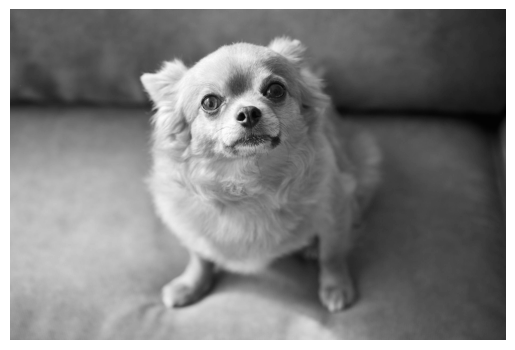

In [ ]:
for category in categories:
    path=os.path.join(datadir,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.axis("off")
        plt.show()
        break
    break

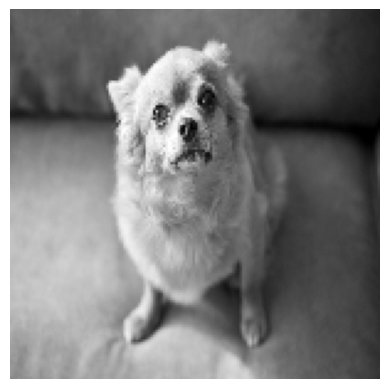

In [ ]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.axis("off")
plt.show()

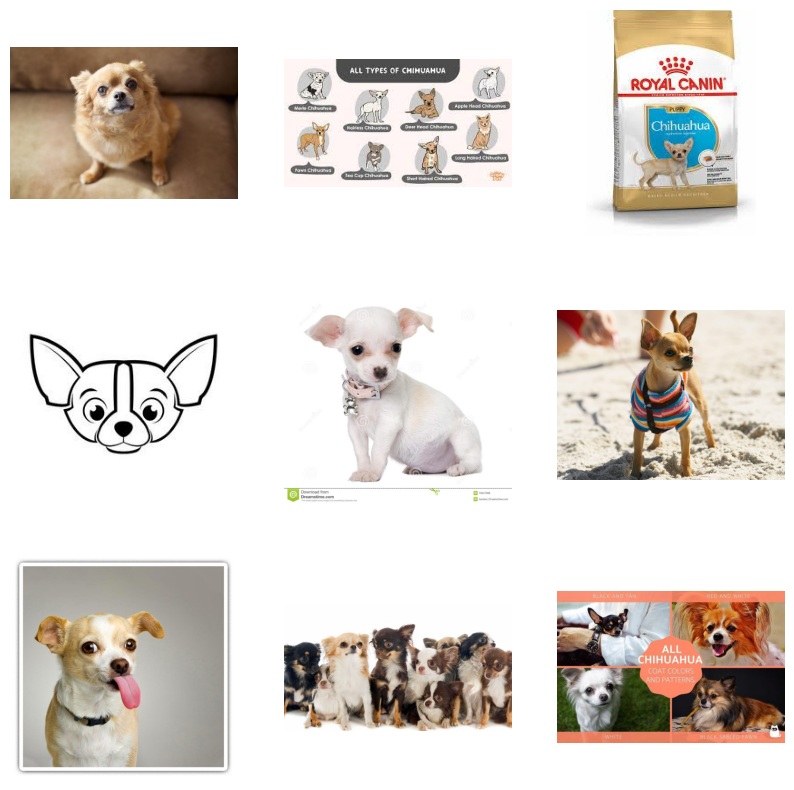

In [ ]:
image_datas=[]
f, axarr = plt.subplots(3,3, figsize=(10,10))
im_index=0

for row in range(3):
    for column in range(3):
        path=os.path.join(datadir,'chihuahua')
        image_datas.append(cv2.imread(os.path.join(path,os.listdir(path)[im_index])))
        axarr[row,column].imshow(cv2.cvtColor(image_datas[im_index], cv2.COLOR_BGR2RGB))
        im_index+=1
        axarr[row,column].axis("off")

plt.show()

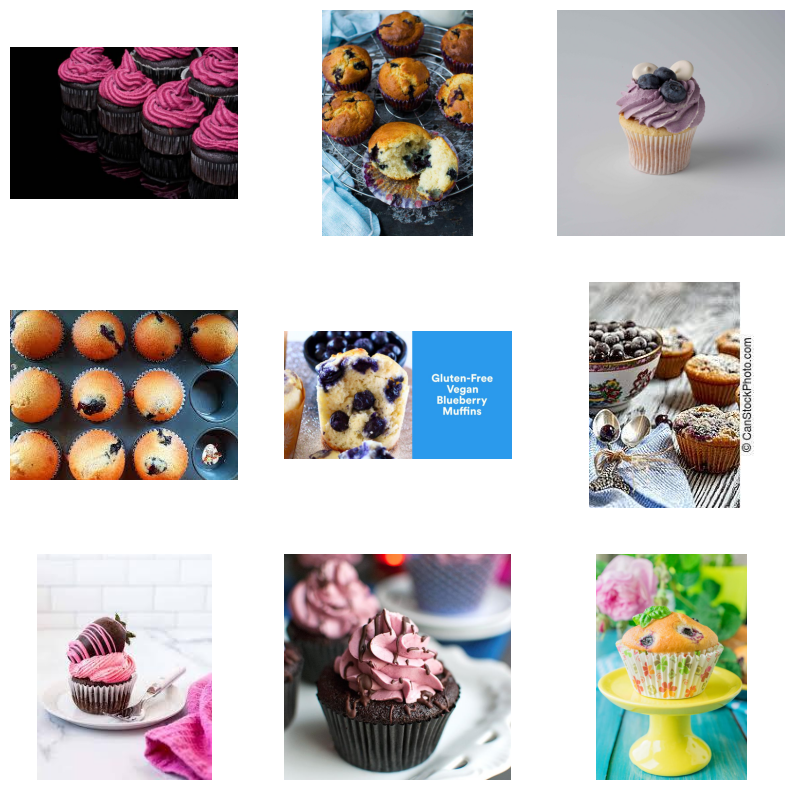

In [ ]:
image_datas=[]
f, axarr = plt.subplots(3,3, figsize=(10,10))
im_index=0

for row in range(3):
    for column in range(3):
        path=os.path.join(datadir,'muffin')
        image_datas.append(cv2.imread(os.path.join(path,os.listdir(path)[im_index])))
        axarr[row,column].imshow(cv2.cvtColor(image_datas[im_index], cv2.COLOR_BGR2RGB))
        im_index+=1
        axarr[row,column].axis("off")

plt.show()

In [ ]:
IMG_SIZE=150
training_data=[]
categories=["chihuahua", "muffin"]
def create_training_data():
    for category in categories:  #two cycles -> one for dogs and the other for muffins

        path = os.path.join("/content/drive/MyDrive/ML project/train",category)  # create path to dogs and muffins
        class_num = categories.index(category)  # binary class -> 0 equals dogs, 1 equals muffins


        for img in os.listdir(path):  # iterate over each image

            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array

            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size

            training_data.append([new_array, class_num])  # add this to our training_data


test_data=[]
def create_test_data():
    for category in categories:  #two cycles -> one for dogs and the other for muffins

        path = os.path.join("/content/drive/MyDrive/ML project/test",category)  # create path to dogs and muffins
        class_num = categories.index(category)  # binary class -> 0 equals dogs, 1 equals muffins


        for img in os.listdir(path):  # iterate over each image

            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array

            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size

            test_data.append([new_array, class_num])  # add this to our test_data

create_training_data()

create_test_data()
print(len(training_data))

4743


Shuffle data in order to avoid "order bias".

In [ ]:
random.shuffle(training_data)
random.shuffle(test_data)

Create X_train, y_train and X_test and y_test

In [ ]:
X_train=[]
y_train=[]

for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #convert all the images to gray scale
X_train=X_train/255
y_train=np.array(y_train)

X_test=[]
y_test=[]
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test=np.array(y_test)
X_test=X_test/255
y_test=np.array(y_test)

Saving the variables with pickle so that I do not have to run all these cells every time.

In [ ]:
pickle_out = open( "/content/drive/MyDrive/ML project/" + "X_train.pickle","wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/ML project/"+"y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()


pickle_out = open( "/content/drive/MyDrive/ML project/" + "X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/ML project/"+"y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()











## Beginning of the analysis

In [ ]:
custom_seed_set()

model0=Sequential()

model0.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model0.add(MaxPooling2D(2,2))

model0.add(Conv2D(64,(3,3),activation="relu"))
model0.add(MaxPooling2D(2,2))

model0.add(Conv2D(64,(3,3),activation="relu"))
model0.add(MaxPooling2D(2,2))

model0.add(Flatten())
model0.add(Dense(64, activation="relu"))

model0.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model0.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
history0 = model0.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.1
)

Epoch 1/20
138/138 [==============================] - 4s 22ms/step - loss: 1.6105 - accuracy: 0.5687 - val_loss: 0.6662 - val_accuracy: 0.5958
Epoch 2/20
138/138 [==============================] - 3s 19ms/step - loss: 0.6159 - accuracy: 0.6755 - val_loss: 0.6820 - val_accuracy: 0.6526
Epoch 3/20
138/138 [==============================] - 3s 19ms/step - loss: 0.5910 - accuracy: 0.7172 - val_loss: 0.5992 - val_accuracy: 0.7158
Epoch 4/20
138/138 [==============================] - 3s 19ms/step - loss: 0.5431 - accuracy: 0.7573 - val_loss: 0.6444 - val_accuracy: 0.7284
Epoch 5/20
138/138 [==============================] - 3s 19ms/step - loss: 0.4230 - accuracy: 0.8107 - val_loss: 0.5135 - val_accuracy: 0.7389
Epoch 6/20
138/138 [==============================] - 3s 20ms/step - loss: 0.3047 - accuracy: 0.8714 - val_loss: 0.5619 - val_accuracy: 0.7621
Epoch 7/20
138/138 [==============================] - 3s 20ms/step - loss: 0.1922 - accuracy: 0.9278 - val_loss: 0.6316 - val_accuracy: 0.7726

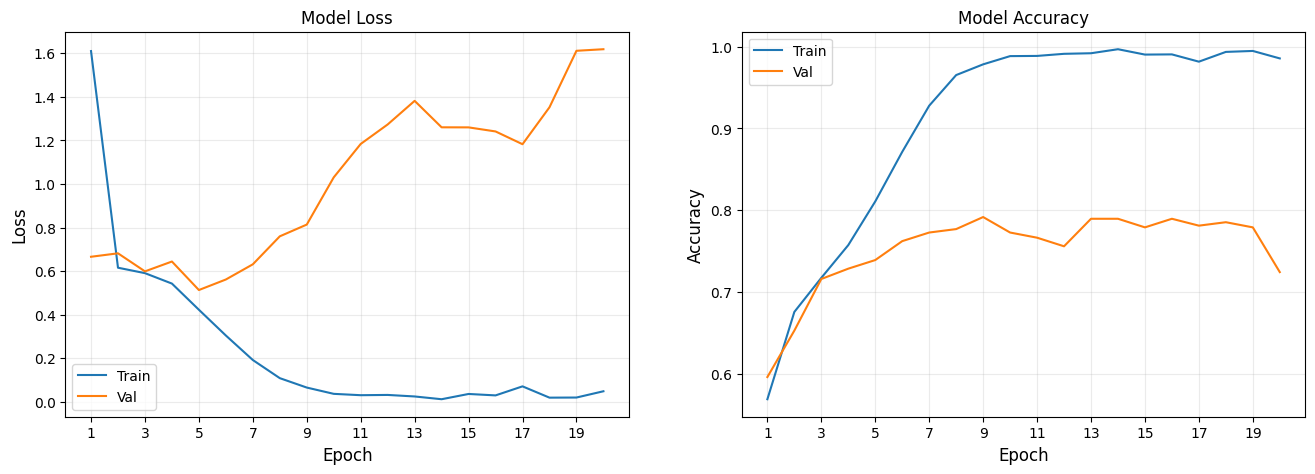

In [ ]:
performance_plot(history0)

In [ ]:
#model 0 with dropout


custom_seed_set()

model0=Sequential()

model0.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model0.add(MaxPooling2D(2,2))

model0.add(Conv2D(64,(3,3),activation="relu"))
model0.add(MaxPooling2D(2,2))

model0.add(Conv2D(64,(3,3),activation="relu"))
model0.add(MaxPooling2D(2,2))

model0.add(Flatten())

model0.add(Dense(64, activation="relu"))
model0.add(Dropout(0.5))

model0.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model0.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 64)        0

In [ ]:
history0_1 = model0.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.1
)

Epoch 1/20
138/138 [==============================] - 12s 27ms/step - loss: 0.6198 - accuracy: 0.6560 - val_loss: 0.4221 - val_accuracy: 0.8126
Epoch 2/20
138/138 [==============================] - 3s 20ms/step - loss: 0.4804 - accuracy: 0.7870 - val_loss: 0.3737 - val_accuracy: 0.8337
Epoch 3/20
138/138 [==============================] - 3s 21ms/step - loss: 0.4073 - accuracy: 0.8208 - val_loss: 0.3292 - val_accuracy: 0.8379
Epoch 4/20
138/138 [==============================] - 3s 21ms/step - loss: 0.3426 - accuracy: 0.8529 - val_loss: 0.2988 - val_accuracy: 0.8547
Epoch 5/20
138/138 [==============================] - 3s 20ms/step - loss: 0.2871 - accuracy: 0.8819 - val_loss: 0.3038 - val_accuracy: 0.8653
Epoch 6/20
138/138 [==============================] - 3s 20ms/step - loss: 0.2346 - accuracy: 0.9056 - val_loss: 0.2960 - val_accuracy: 0.8758
Epoch 7/20
138/138 [==============================] - 3s 20ms/step - loss: 0.2024 - accuracy: 0.9203 - val_loss: 0.2587 - val_accuracy: 0.886

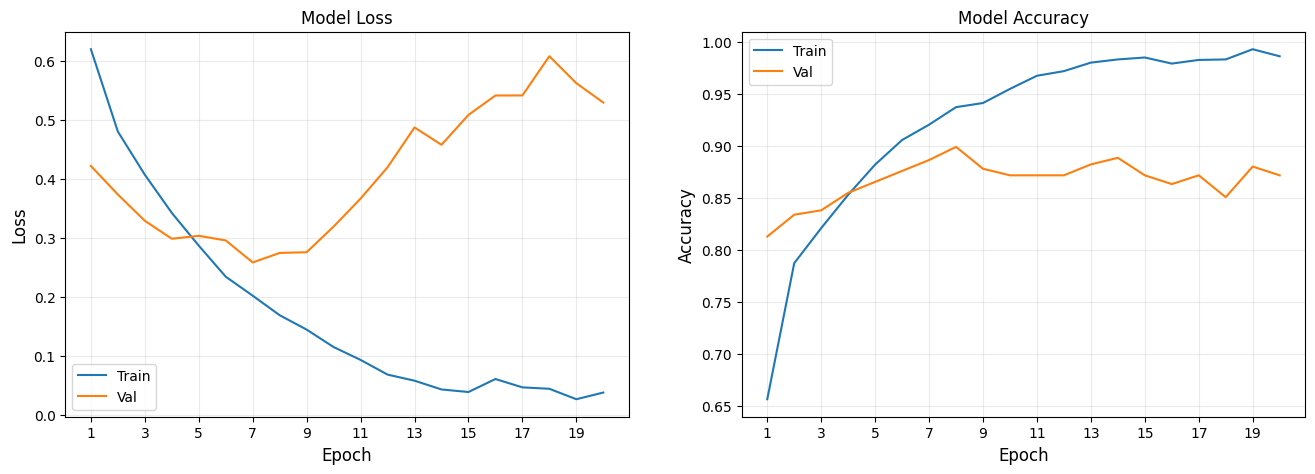

In [ ]:
performance_plot(history0_1)

In [ ]:
#model 0 with BN


custom_seed_set()

model0=Sequential()

model0.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model0.add(MaxPooling2D(2,2))

model0.add(Conv2D(64,(3,3),activation="relu"))
model0.add(MaxPooling2D(2,2))

model0.add(Conv2D(64,(3,3),activation="relu"))
model0.add(MaxPooling2D(2,2))

model0.add(Flatten())
model0.add(Dense(64, activation="relu"))
model0.add(BatchNormalization())

model0.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model0.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
history0_2 = model0.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_split=0.1
)

Epoch 1/20
138/138 [==============================] - 6s 24ms/step - loss: 0.4852 - accuracy: 0.7800 - val_loss: 1.7030 - val_accuracy: 0.5326
Epoch 2/20
138/138 [==============================] - 3s 23ms/step - loss: 0.4126 - accuracy: 0.8269 - val_loss: 0.5827 - val_accuracy: 0.7558
Epoch 3/20
138/138 [==============================] - 4s 25ms/step - loss: 0.3479 - accuracy: 0.8465 - val_loss: 0.8913 - val_accuracy: 0.6316
Epoch 4/20
138/138 [==============================] - 3s 22ms/step - loss: 0.2810 - accuracy: 0.8814 - val_loss: 0.3490 - val_accuracy: 0.8421
Epoch 5/20
138/138 [==============================] - 3s 22ms/step - loss: 0.2251 - accuracy: 0.9107 - val_loss: 0.7300 - val_accuracy: 0.7053
Epoch 6/20
138/138 [==============================] - 3s 21ms/step - loss: 0.1834 - accuracy: 0.9285 - val_loss: 1.3107 - val_accuracy: 0.5600
Epoch 7/20
138/138 [==============================] - 3s 23ms/step - loss: 0.1442 - accuracy: 0.9478 - val_loss: 0.3721 - val_accuracy: 0.8463

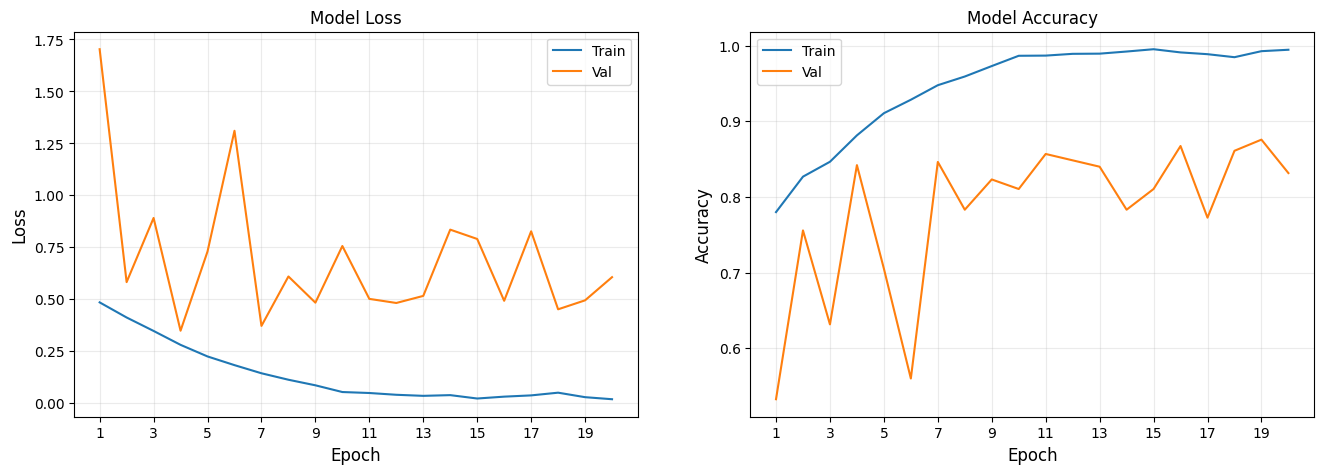

In [ ]:
performance_plot(history0_2)

The model clearly does not interpret correctly unseed data &rarr; big overfitting.

## SECOND MODEL

In [ ]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model1.add(MaxPooling2D(2,2))


model1.add(Conv2D(32,(3,3),activation="relu"))
model1.add(MaxPooling2D(2,2))

model1.add(Conv2D(64,(3,3),activation="relu"))
model1.add(MaxPooling2D(2,2))


model1.add(Flatten())


model1.add(Dense(64, activation="relu"))
model1.add(Dropout(0.7))

model1.add(Dense(64, activation="relu"))

model1.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history1 = model1.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1,
    shuffle=True
)

Epoch 1/20
138/138 [==============================] - 6s 25ms/step - loss: 0.6702 - accuracy: 0.5694 - val_loss: 0.5810 - val_accuracy: 0.7663
Epoch 2/20
138/138 [==============================] - 2s 18ms/step - loss: 0.5782 - accuracy: 0.6891 - val_loss: 0.4946 - val_accuracy: 0.7874
Epoch 3/20
138/138 [==============================] - 2s 17ms/step - loss: 0.5344 - accuracy: 0.7301 - val_loss: 0.4478 - val_accuracy: 0.8232
Epoch 4/20
138/138 [==============================] - 2s 16ms/step - loss: 0.4722 - accuracy: 0.7748 - val_loss: 0.4418 - val_accuracy: 0.8379
Epoch 5/20
138/138 [==============================] - 2s 16ms/step - loss: 0.4496 - accuracy: 0.7840 - val_loss: 0.3850 - val_accuracy: 0.8463
Epoch 6/20
138/138 [==============================] - 2s 15ms/step - loss: 0.4082 - accuracy: 0.8034 - val_loss: 0.4025 - val_accuracy: 0.8568
Epoch 7/20
138/138 [==============================] - 2s 16ms/step - loss: 0.3734 - accuracy: 0.8313 - val_loss: 0.3969 - val_accuracy: 0.8211

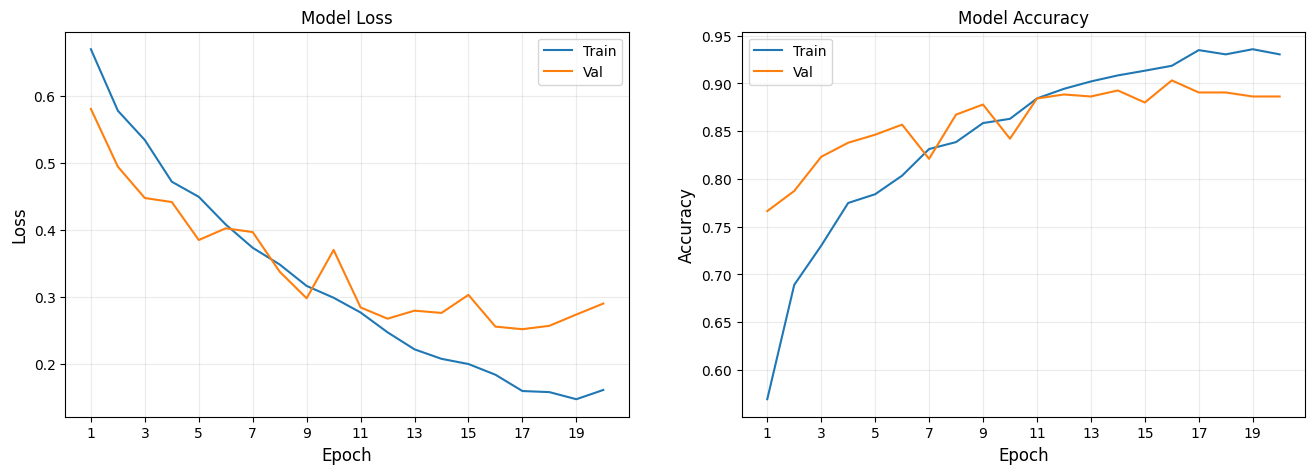

In [ ]:
performance_plot(history1)

#### Little adjustments

In [ ]:
model2=Sequential()
model2.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model2.add(MaxPooling2D(2,2))


model2.add(Conv2D(32,(3,3),activation="relu"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64,(3,3),activation="relu"))
model2.add(MaxPooling2D(2,2))


model2.add(Flatten())


model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.7))

model2.add(Dense(64, activation="relu"))

model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history2_1 = model2.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[monitor]
)

Epoch 1/60
138/138 [==============================] - 4s 19ms/step - loss: 0.7818 - accuracy: 0.5621 - val_loss: 0.6310 - val_accuracy: 0.7768
Epoch 2/60
138/138 [==============================] - 2s 16ms/step - loss: 0.6429 - accuracy: 0.6649 - val_loss: 0.5331 - val_accuracy: 0.8084
Epoch 3/60
138/138 [==============================] - 2s 17ms/step - loss: 0.6041 - accuracy: 0.7109 - val_loss: 0.5239 - val_accuracy: 0.8126
Epoch 4/60
138/138 [==============================] - 2s 17ms/step - loss: 0.5649 - accuracy: 0.7641 - val_loss: 0.5836 - val_accuracy: 0.7179
Epoch 5/60
138/138 [==============================] - 2s 16ms/step - loss: 0.5619 - accuracy: 0.7556 - val_loss: 0.5050 - val_accuracy: 0.8211
Epoch 6/60
138/138 [==============================] - 2s 16ms/step - loss: 0.5455 - accuracy: 0.7655 - val_loss: 0.5033 - val_accuracy: 0.8189
Epoch 7/60
138/138 [==============================] - 3s 18ms/step - loss: 0.5350 - accuracy: 0.7744 - val_loss: 0.5100 - val_accuracy: 0.7916

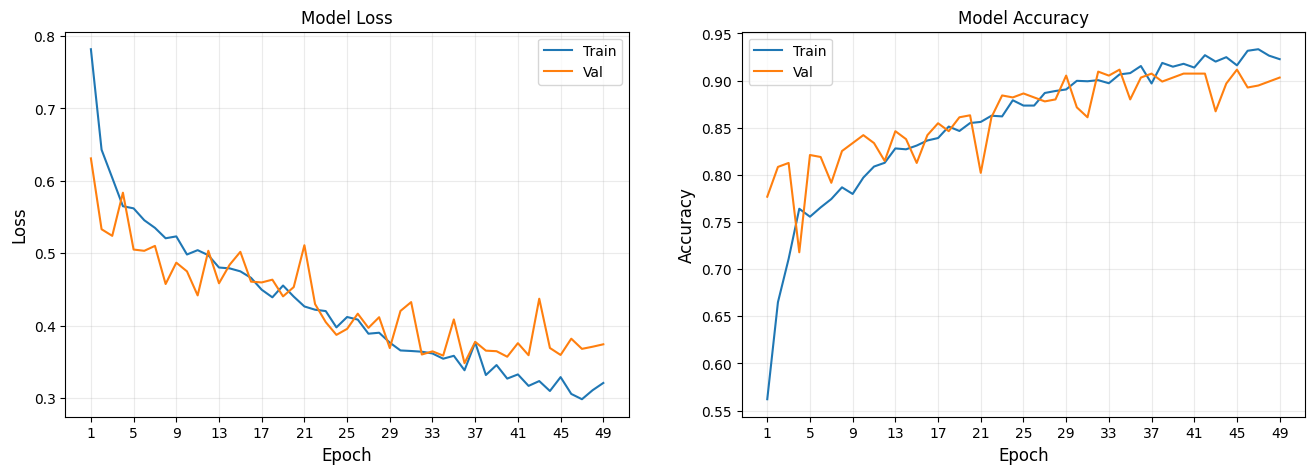

In [ ]:
performance_plot(history2_1)

## HYPERPARAMETER TUNING 2nd MODEL

### Learning rate tuning

In [ ]:
#lr = 0.01
model2=Sequential()
model2.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model2.add(MaxPooling2D(2,2))


model2.add(Conv2D(32,(3,3),activation="relu"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64,(3,3),activation="relu"))
model2.add(MaxPooling2D(2,2))


model2.add(Flatten())


model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.7))

model2.add(Dense(64, activation="relu"))

model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.01), metrics=["accuracy"])
monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=False)
history2_3_lr01 = model2.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[monitor]
)

Epoch 1/60
138/138 [==============================] - 6s 28ms/step - loss: 0.8526 - accuracy: 0.5358 - val_loss: 0.6923 - val_accuracy: 0.5326
Epoch 2/60
138/138 [==============================] - 3s 22ms/step - loss: 0.6900 - accuracy: 0.5426 - val_loss: 0.6911 - val_accuracy: 0.5326
Epoch 3/60
138/138 [==============================] - 2s 17ms/step - loss: 0.6904 - accuracy: 0.5426 - val_loss: 0.6911 - val_accuracy: 0.5326
Epoch 4/60
138/138 [==============================] - 2s 15ms/step - loss: 0.6901 - accuracy: 0.5426 - val_loss: 0.6910 - val_accuracy: 0.5326
Epoch 5/60
138/138 [==============================] - 2s 15ms/step - loss: 0.6901 - accuracy: 0.5426 - val_loss: 0.6914 - val_accuracy: 0.5326
Epoch 6/60
138/138 [==============================] - 2s 15ms/step - loss: 0.6902 - accuracy: 0.5426 - val_loss: 0.6910 - val_accuracy: 0.5326
Epoch 7/60
138/138 [==============================] - 2s 17ms/step - loss: 0.6897 - accuracy: 0.5426 - val_loss: 0.6911 - val_accuracy: 0.5326

In [ ]:
#lr = 0.0001
model2=Sequential()
model2.add(Conv2D(32,(3,3),activation="relu", input_shape=(150,150,1)))
model2.add(MaxPooling2D(2,2))


model2.add(Conv2D(32,(3,3),activation="relu"))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64,(3,3),activation="relu"))
model2.add(MaxPooling2D(2,2))


model2.add(Flatten())


model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.7))

model2.add(Dense(64, activation="relu"))

model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.0001), metrics=["accuracy"])
monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=False)

history2_3_lr0001 = model2.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[monitor]
)

Epoch 1/60
138/138 [==============================] - 5s 19ms/step - loss: 1.2648 - accuracy: 0.5494 - val_loss: 0.8610 - val_accuracy: 0.7684
Epoch 2/60
138/138 [==============================] - 2s 16ms/step - loss: 0.7616 - accuracy: 0.6136 - val_loss: 0.6485 - val_accuracy: 0.7200
Epoch 3/60
138/138 [==============================] - 2s 16ms/step - loss: 0.6398 - accuracy: 0.7116 - val_loss: 0.5545 - val_accuracy: 0.8147
Epoch 4/60
138/138 [==============================] - 2s 16ms/step - loss: 0.5893 - accuracy: 0.7441 - val_loss: 0.5058 - val_accuracy: 0.8211
Epoch 5/60
138/138 [==============================] - 2s 16ms/step - loss: 0.5475 - accuracy: 0.7638 - val_loss: 0.4808 - val_accuracy: 0.8126
Epoch 6/60
138/138 [==============================] - 3s 18ms/step - loss: 0.5405 - accuracy: 0.7734 - val_loss: 0.4773 - val_accuracy: 0.8232
Epoch 7/60
138/138 [==============================] - 2s 17ms/step - loss: 0.5197 - accuracy: 0.7837 - val_loss: 0.4642 - val_accuracy: 0.8295

The best LR appears to be the default 0.001

In [ ]:
#HYPERPARAMETERS OF THE CONVS
#filter optimization for conv
filters=[]
current_filters=[]
possible_values=[32, 64, 128]
for i in possible_values:
  for j in possible_values:
    for h in possible_values:
      current_filters.append(i)
      current_filters.append(j)
      current_filters.append(h)
      filters.append(current_filters)
      current_filters=[]


hist=[]
for i in range(len(filters)):
  model2=Sequential()
  model2.add(Conv2D(filters[i][0],(3,3),activation="relu", input_shape=(150,150,1)))
  model2.add(MaxPooling2D(2,2))


  model2.add(Conv2D(filters[i][1],(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Conv2D(filters[i][2],(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Flatten())

  model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
  model2.add(Dropout(0.7))

  model2.add(Dense(64, activation="relu"))

  model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification


  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=False)


  model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])



  print("\n{}  -  {}  -  {}    model\n".format(filters[i][0], filters[i][1], filters[i][2]))

  history2_filters = model2.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[monitor]
    )
  hist.append(history2_filters)
pickle_out = open( "/content/drive/MyDrive/ML project/" + "history_model2_conv.pickle","wb")
pickle.dump(hist, pickle_out)
pickle_out.close()


32  -  32  -  32    model

Epoch 1/60
138/138 [==============================] - 18s 25ms/step - loss: 0.7585 - accuracy: 0.5426 - val_loss: 0.6819 - val_accuracy: 0.5326
Epoch 2/60
138/138 [==============================] - 2s 16ms/step - loss: 0.6888 - accuracy: 0.5426 - val_loss: 0.6568 - val_accuracy: 0.5326
Epoch 3/60
138/138 [==============================] - 2s 16ms/step - loss: 0.6741 - accuracy: 0.6671 - val_loss: 0.6698 - val_accuracy: 0.7537
Epoch 4/60
138/138 [==============================] - 2s 17ms/step - loss: 0.6659 - accuracy: 0.6992 - val_loss: 0.6240 - val_accuracy: 0.7874
Epoch 5/60
138/138 [==============================] - 2s 16ms/step - loss: 0.6561 - accuracy: 0.6942 - val_loss: 0.6092 - val_accuracy: 0.8000
Epoch 6/60
138/138 [==============================] - 2s 17ms/step - loss: 0.6497 - accuracy: 0.7031 - val_loss: 0.6090 - val_accuracy: 0.7979
Epoch 7/60
138/138 [==============================] - 3s 18ms/step - loss: 0.6368 - accuracy: 0.7235 - val_loss: 

In [ ]:
#saving the history in case of future analyses
pickle_out = open( "/content/drive/MyDrive/ML project/" + "history_model2_conv.pickle","wb")
pickle.dump(hist, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open( "/content/drive/MyDrive/ML project/"+"history_model2_conv.pickle","rb")
history_model2_conv = pickle.load(pickle_in)

In [ ]:
filters=[]
current_filters=[]
possible_values=[32, 64, 128]
for i in possible_values:
  for j in possible_values:
    for h in possible_values:
      current_filters.append(i)
      current_filters.append(j)
      current_filters.append(h)
      filters.append(current_filters)
      current_filters=[]


current_max=0
pos=0
for i in range(len(history_model2_conv)):

  if max(history_model2_conv[i].history['val_accuracy'])>0.85:
    print("index: {} \n{}  {}  {} model\nnr of epochs: {} - max :  {}\n".format(i, filters[i][0],filters[i][1],filters[i][2], len(history_model2_conv[i].history['val_accuracy']),
                                                                 max(history_model2_conv[i].history['val_accuracy'])))


  if max(history_model2_conv[i].history['val_accuracy'])>current_max:
    current_max=max(history_model2_conv[i].history['val_accuracy'])
    pos=i
print(current_max, pos)

index: 0 
32  32  32 model
nr of epochs: 48 - max :  0.8631578683853149

index: 1 
32  32  64 model
nr of epochs: 60 - max :  0.8989473581314087

index: 4 
32  64  64 model
nr of epochs: 48 - max :  0.890526294708252

index: 11 
64  32  128 model
nr of epochs: 35 - max :  0.8610526323318481

index: 14 
64  64  128 model
nr of epochs: 52 - max :  0.9052631855010986

index: 16 
64  128  64 model
nr of epochs: 42 - max :  0.8736842274665833

index: 19 
128  32  64 model
nr of epochs: 54 - max :  0.8842105269432068

index: 23 
128  64  128 model
nr of epochs: 46 - max :  0.854736864566803

0.9052631855010986 14


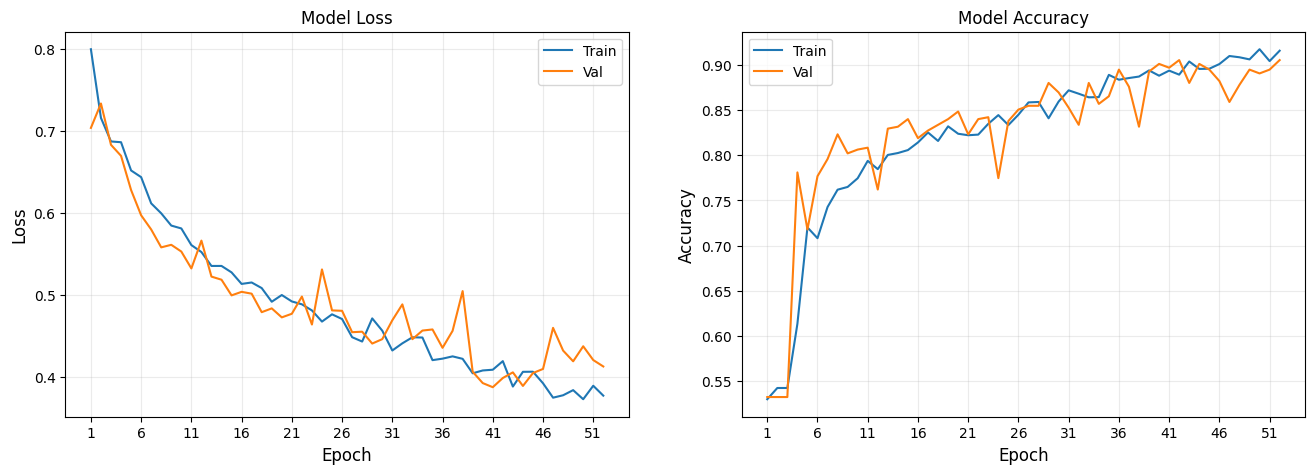

In [ ]:
performance_plot(history_model2[14])

### Dropout tuning


In [ ]:
hist=[]
# p=0.7 was already checked, every model up to now had p=0.7
for i in range(4,7):
  model2=Sequential()
  model2.add(Conv2D(64,(3,3),activation="relu", input_shape=(150,150,1)))
  model2.add(MaxPooling2D(2,2))


  model2.add(Conv2D(64,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Conv2D(128,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Flatten())

  model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
  model2.add(Dropout(i/10))

  model2.add(Dense(64, activation="relu"))

  model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

  model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=False)

  print("Model with p= {}\n".format(i/10))

  history2_dropout = model2.fit(
  X_train,
  y_train,
  epochs=60,
  batch_size=32,
  validation_split=0.1,
  shuffle=True,
  callbacks=[monitor]
  )
  hist.append(history2_dropout)

pickle_out = open( "/content/drive/MyDrive/ML project/" + "history_model2_dropout.pickle","wb")
pickle.dump(hist, pickle_out)
pickle_out.close()

Model with p= 0.4

Epoch 1/60
138/138 [==============================] - 6s 31ms/step - loss: 0.7641 - accuracy: 0.5665 - val_loss: 0.6897 - val_accuracy: 0.5663
Epoch 2/60
138/138 [==============================] - 4s 28ms/step - loss: 0.6333 - accuracy: 0.7102 - val_loss: 0.6250 - val_accuracy: 0.7937
Epoch 3/60
138/138 [==============================] - 5s 36ms/step - loss: 0.5708 - accuracy: 0.7591 - val_loss: 0.5122 - val_accuracy: 0.8084
Epoch 4/60
138/138 [==============================] - 4s 28ms/step - loss: 0.5451 - accuracy: 0.7776 - val_loss: 0.4951 - val_accuracy: 0.8000
Epoch 5/60
138/138 [==============================] - 4s 28ms/step - loss: 0.5023 - accuracy: 0.7980 - val_loss: 0.4694 - val_accuracy: 0.8400
Epoch 6/60
138/138 [==============================] - 4s 28ms/step - loss: 0.4958 - accuracy: 0.8114 - val_loss: 0.4751 - val_accuracy: 0.8084
Epoch 7/60
138/138 [==============================] - 4s 29ms/step - loss: 0.4878 - accuracy: 0.8158 - val_loss: 0.5041 - v

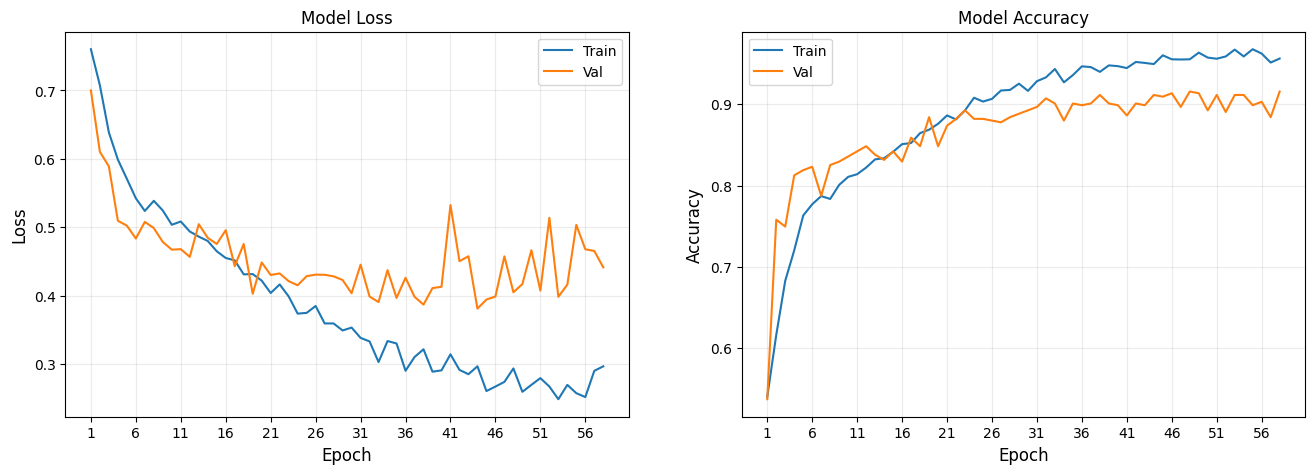

In [ ]:
performance_plot(hist[2])

In [ ]:
pickle_out = open( "/content/drive/MyDrive/ML project/" + "history_model2_dropout.pickle","wb")
pickle.dump(hist, pickle_out)
pickle_out.close()

## Regularization term $\lambda$ optimization

In [ ]:
regularization=[0.1,0.01,0.001,0.0001,0.00001,0]
history2_reg=[]
for i in regularization:
  model2=Sequential()
  model2.add(Conv2D(64,(3,3),activation="relu", input_shape=(150,150,1)))
  model2.add(MaxPooling2D(2,2))


  model2.add(Conv2D(64,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Conv2D(128,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Flatten())

  model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(i)))
  model2.add(Dropout(0.6))

  model2.add(Dense(64, activation="relu"))

  model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

  model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=False)

  hist = model2.fit(
  X_train,
  y_train,
  epochs=60,
  batch_size=32,
  validation_split=0.1,
  shuffle=True,
  callbacks=[monitor]
  )
  history2_reg.append(hist)

Epoch 1/60
138/138 [==============================] - 8s 32ms/step - loss: 1.1539 - accuracy: 0.5349 - val_loss: 0.6932 - val_accuracy: 0.5326
Epoch 2/60
138/138 [==============================] - 4s 29ms/step - loss: 0.6921 - accuracy: 0.5401 - val_loss: 0.6945 - val_accuracy: 0.5326
Epoch 3/60
138/138 [==============================] - 4s 30ms/step - loss: 0.6970 - accuracy: 0.5551 - val_loss: 0.7082 - val_accuracy: 0.5326
Epoch 4/60
138/138 [==============================] - 4s 29ms/step - loss: 0.7030 - accuracy: 0.5590 - val_loss: 0.7337 - val_accuracy: 0.5558
Epoch 5/60
138/138 [==============================] - 4s 29ms/step - loss: 0.7137 - accuracy: 0.6179 - val_loss: 0.6841 - val_accuracy: 0.7411
Epoch 6/60
138/138 [==============================] - 4s 30ms/step - loss: 0.6635 - accuracy: 0.6746 - val_loss: 0.6188 - val_accuracy: 0.8189
Epoch 7/60
138/138 [==============================] - 4s 30ms/step - loss: 0.6386 - accuracy: 0.7371 - val_loss: 0.5958 - val_accuracy: 0.7853

In [ ]:
regularization=[0.1,0.01,0.001,0.0001,0.00001,0]
max_value=0
for i in range(len(history2_reg)):
  if max_value<max(history2_reg[i].history['val_accuracy']):

    max_value=max(history2_reg[i].history['val_accuracy'])
    print("Max value: {}, obtained with lambda={} at epoch {}".format(max_value, regularization[i], len(history2_reg[i].history['val_loss'])-10))


Max value: 0.88210529088974, obtained with lambda=0.1 at epoch 37
Max value: 0.9242105484008789, obtained with lambda=0.01 at epoch 50


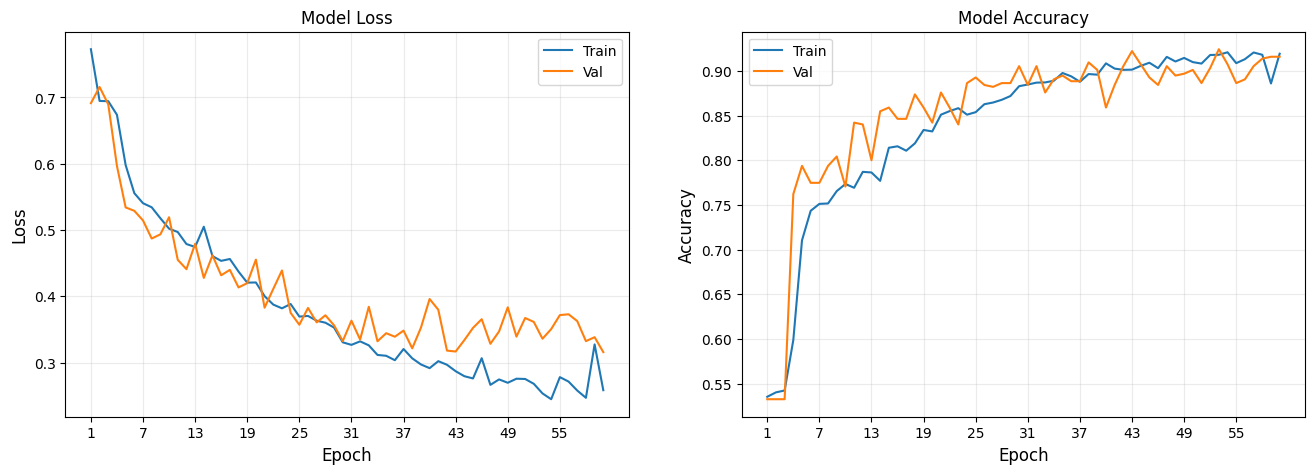

In [ ]:
performance_plot(history2_reg[1])

In [ ]:
pickle_out = open( "/content/drive/MyDrive/ML project/" + "hist2_reg.pickle","wb")
pickle.dump(history2_reg, pickle_out)
pickle_out.close()

### DENSE tuning

In [ ]:
possible_values=[32,64,128]
history2_dense=[]
for i in possible_values:
  for j in possible_values:
    model2=Sequential()
    model2.add(Conv2D(64,(3,3),activation="relu", input_shape=(150,150,1)))
    model2.add(MaxPooling2D(2,2))


    model2.add(Conv2D(64,(3,3),activation="relu"))
    model2.add(MaxPooling2D(2,2))

    model2.add(Conv2D(128,(3,3),activation="relu"))
    model2.add(MaxPooling2D(2,2))

    model2.add(Flatten())

    model2.add(Dense(i, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
    model2.add(Dropout(0.6))

    model2.add(Dense(j, activation="relu"))

    model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

    model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
    monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=False)
    print("\nModel with nodes:  {}     {}\n".format(i, j))
    hist = model2.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_split=0.1,
    shuffle=True,
    callbacks=[monitor]
    )

    history2_dense.append(hist)


Model with nodes:  32     32

Epoch 1/60
138/138 [==============================] - 6s 31ms/step - loss: 0.7409 - accuracy: 0.5344 - val_loss: 0.6997 - val_accuracy: 0.5326
Epoch 2/60
138/138 [==============================] - 4s 29ms/step - loss: 0.6953 - accuracy: 0.5426 - val_loss: 0.6790 - val_accuracy: 0.5326
Epoch 3/60
138/138 [==============================] - 4s 29ms/step - loss: 0.6969 - accuracy: 0.5426 - val_loss: 0.6987 - val_accuracy: 0.5326
Epoch 4/60
138/138 [==============================] - 4s 29ms/step - loss: 0.6936 - accuracy: 0.5426 - val_loss: 0.6787 - val_accuracy: 0.5326
Epoch 5/60
138/138 [==============================] - 4s 29ms/step - loss: 0.6652 - accuracy: 0.6047 - val_loss: 0.5597 - val_accuracy: 0.7832
Epoch 6/60
138/138 [==============================] - 4s 30ms/step - loss: 0.6396 - accuracy: 0.6396 - val_loss: 0.5296 - val_accuracy: 0.7916
Epoch 7/60
138/138 [==============================] - 4s 29ms/step - loss: 0.5928 - accuracy: 0.6757 - val_loss

In [ ]:
possible_values=[32,64,128]
combinations=[]
current_index=[]
for i in possible_values:
  for j in possible_values:
    current_index.append(i)
    current_index.append(j)
    combinations.append(current_index)
    current_index=[]

max_value=0
for i in range(len(history2_dense)):
  if max_value<max(history2_dense[i].history['val_accuracy']):

    max_value=max(history2_dense[i].history['val_accuracy'])
    print("Max value: {}, with loss {}, obtained with filters={} at epoch {} at index {}".format(max_value, history2_dense[i].history['val_loss'][len(history2_dense[i].history['val_loss'])-11],combinations[i], len(history2_dense[i].history['val_loss'])-10, i))

Max value: 0.9052631855010986, with loss 0.31274986267089844, obtained with filters=[32, 32] at epoch 46 at index 0
Max value: 0.9136841893196106, with loss 0.4822031259536743, obtained with filters=[64, 32] at epoch 35 at index 3


In [ ]:
history2_dense[4].history['val_loss'][history2_dense[4].history['val_accuracy'].index(max(history2_dense[4].history['val_accuracy']))]

0.4470609128475189

Even though $(32,32)$ showed the lowest loss and $(64,32)$ showed the highest overall accuracy, I decided to select the tuple $(64,64)$ because it is the most reliable one. Indeed, with $(32,32)$ neurons, the learning process is extremely slow: even after 60 epochs the accuracy of the training was not at 0.9 and with $(64,32)$ the loss was simply too high, being always around 0.5.

For these reasons I chose $(64,64)$: it is the mid-way solution: high accuracy and lower loss.

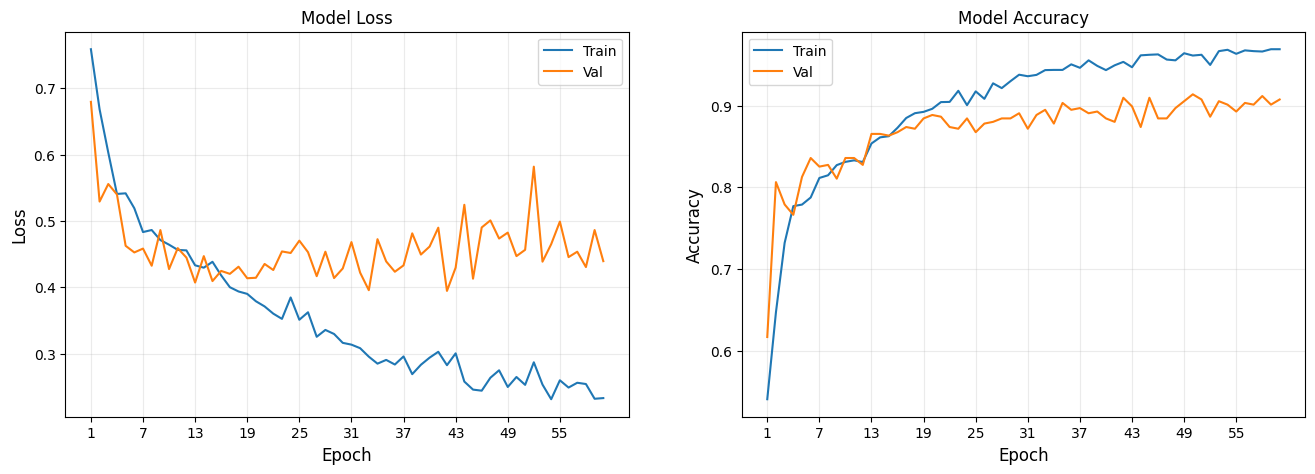

In [ ]:
performance_plot(history2_dense[4])

In [ ]:
pickle_out = open( "/content/drive/MyDrive/ML project/" + "hist2_dense.pickle","wb")
pickle.dump(history2_dense, pickle_out)
pickle_out.close()

### Tuning of the kernel size

In [ ]:
k_size=[3,5,7]
hist_ksize=[]
for k in k_size:
  model2=Sequential()
  model2.add(Conv2D(64,(k,k),activation="relu", input_shape=(150,150,1)))
  model2.add(MaxPooling2D(2,2))


  model2.add(Conv2D(64,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Conv2D(128,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Flatten())

  model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
  model2.add(Dropout(0.6))

  model2.add(Dense(64, activation="relu"))

  model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

  model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=15, verbose=1, restore_best_weights=False)

  print(str(k) + " x " + str(k) +" kernel_size on the first conv layer \n")

  hist = model2.fit(
  X_train,
  y_train,
  epochs=60,
  batch_size=32,
  validation_split=0.1,
  shuffle=True,
  callbacks=[monitor]
  )
  hist_ksize.append(hist)

3 x 3 kernel_size on the first conv layer 

Epoch 1/60
134/134 [==============================] - 6s 36ms/step - loss: 0.7620 - accuracy: 0.5415 - val_loss: 0.6841 - val_accuracy: 0.5326
Epoch 2/60
134/134 [==============================] - 4s 30ms/step - loss: 0.6366 - accuracy: 0.6724 - val_loss: 0.5884 - val_accuracy: 0.8084
Epoch 3/60
134/134 [==============================] - 4s 30ms/step - loss: 0.5781 - accuracy: 0.7259 - val_loss: 0.4826 - val_accuracy: 0.8189
Epoch 4/60
134/134 [==============================] - 5s 34ms/step - loss: 0.5548 - accuracy: 0.7556 - val_loss: 0.4793 - val_accuracy: 0.8105
Epoch 5/60
134/134 [==============================] - 5s 36ms/step - loss: 0.5310 - accuracy: 0.7826 - val_loss: 0.4638 - val_accuracy: 0.8316
Epoch 6/60
134/134 [==============================] - 4s 30ms/step - loss: 0.5118 - accuracy: 0.7812 - val_loss: 0.4860 - val_accuracy: 0.8042
Epoch 7/60
134/134 [==============================] - 4s 31ms/step - loss: 0.4954 - accuracy: 0.79

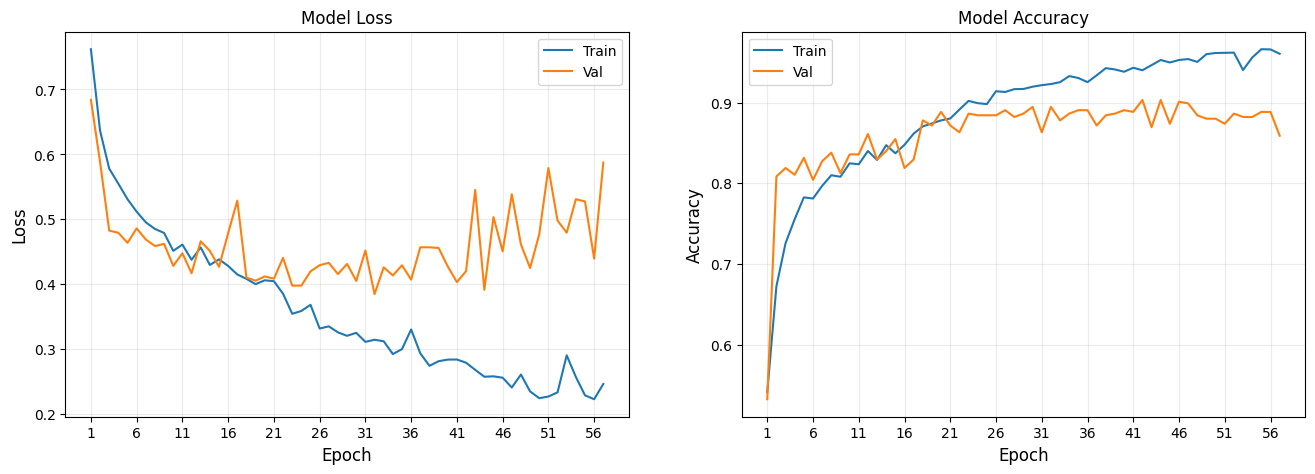

In [ ]:
performance_plot(hist_ksize[0])

Best kernel size: $3 \times 3$

In [ ]:
batch_size=[32,64,128]
hist_batchsize=[]
for batch in batch_size:
  model2=Sequential()
  model2.add(Conv2D(64,(3,3),activation="relu", input_shape=(150,150,1)))
  model2.add(MaxPooling2D(2,2))


  model2.add(Conv2D(64,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Conv2D(128,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Flatten())

  model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
  model2.add(Dropout(0.6))

  model2.add(Dense(64, activation="relu"))

  model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

  model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=15, verbose=1, restore_best_weights=False)

  print(str(batch) + " batch_size\n")

  hist = model2.fit(
  X_train,
  y_train,
  epochs=60,
  batch_size=batch,
  validation_split=0.1,
  shuffle=True,
  callbacks=[monitor]
  )
  hist_batchsize.append(hist)

32 batch_size

Epoch 1/60
134/134 [==============================] - 6s 32ms/step - loss: 0.7738 - accuracy: 0.5384 - val_loss: 0.6917 - val_accuracy: 0.5326
Epoch 2/60
134/134 [==============================] - 4s 30ms/step - loss: 0.6918 - accuracy: 0.5450 - val_loss: 0.6904 - val_accuracy: 0.5326
Epoch 3/60
134/134 [==============================] - 4s 29ms/step - loss: 0.6934 - accuracy: 0.5508 - val_loss: 0.6953 - val_accuracy: 0.5326
Epoch 4/60
134/134 [==============================] - 4s 29ms/step - loss: 0.6956 - accuracy: 0.5433 - val_loss: 0.6812 - val_accuracy: 0.5326
Epoch 5/60
134/134 [==============================] - 4s 34ms/step - loss: 0.6917 - accuracy: 0.5696 - val_loss: 0.7029 - val_accuracy: 0.5326
Epoch 6/60
134/134 [==============================] - 4s 29ms/step - loss: 0.6670 - accuracy: 0.6111 - val_loss: 0.5826 - val_accuracy: 0.6905
Epoch 7/60
134/134 [==============================] - 4s 29ms/step - loss: 0.6234 - accuracy: 0.6741 - val_loss: 0.5235 - val_a

In [ ]:
possible_values=[32,64,128]

max_value=0
for i in range(len(hist_batchsize)):
  if max_value<max(hist_batchsize[i].history['val_accuracy']):

    max_value=max(hist_batchsize[i].history['val_accuracy'])
    print("Max value: {}, with loss {}, at epoch {} at index {}".format(max_value,
                                                                        hist_batchsize[i].history['val_loss'][hist_batchsize[i].history['val_accuracy'].index(max(hist_batchsize[i].history['val_accuracy']))],
                                                                        hist_batchsize[i].history['val_accuracy'].index(max(hist_batchsize[i].history['val_accuracy']))+1, i))

Max value: 0.8947368264198303, with loss 0.4150713086128235, at epoch 55 at index 0
Max value: 0.9136841893196106, with loss 0.41744980216026306, at epoch 60 at index 1


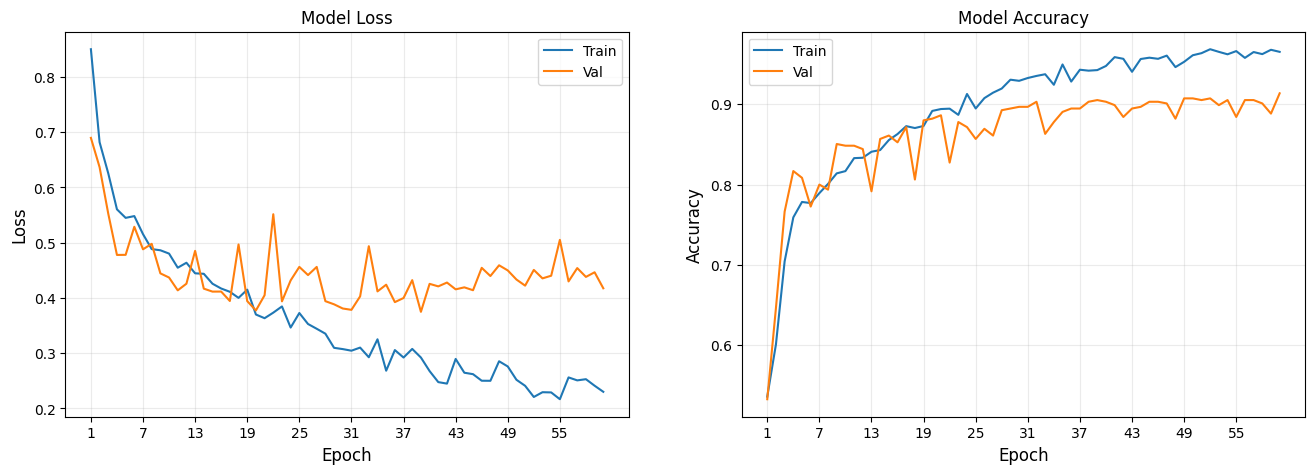

In [ ]:
performance_plot(hist_batchsize[1])

Best batch_size: $64$

## FINAL MODEL

I created a while loop to select the model with the highest accuracy to make the predictions with the confusion matrix. Note that, however, I also performed the 5-Fold Cross Validation in which obtained very close results.

In [ ]:
i=0

while i!=1:
  model2=Sequential()
  model2.add(Conv2D(64,(3,3),activation="relu", input_shape=(150,150,1)))
  model2.add(MaxPooling2D(2,2))


  model2.add(Conv2D(64,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Conv2D(128,(3,3),activation="relu"))
  model2.add(MaxPooling2D(2,2))

  model2.add(Flatten())

  model2.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
  model2.add(Dropout(0.6))

  model2.add(Dense(64, activation="relu"))

  model2.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

  model2.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=15, verbose=1, restore_best_weights=True)

  hist = model2.fit(
  X_train,
  y_train,
  epochs=60,
  batch_size=64,
  validation_split=0.1,
  shuffle=True,
  callbacks=[monitor]
  )

  if max(hist.history['val_accuracy'])>=0.92:
    i=1
  else:
    continue

Epoch 1/60
67/67 [==============================] - 6s 62ms/step - loss: 0.8025 - accuracy: 0.5342 - val_loss: 0.6468 - val_accuracy: 0.5621
Epoch 2/60
67/67 [==============================] - 4s 55ms/step - loss: 0.6618 - accuracy: 0.6888 - val_loss: 0.5343 - val_accuracy: 0.7874
Epoch 3/60
67/67 [==============================] - 4s 54ms/step - loss: 0.5767 - accuracy: 0.7505 - val_loss: 0.5867 - val_accuracy: 0.7347
Epoch 4/60
67/67 [==============================] - 4s 55ms/step - loss: 0.5455 - accuracy: 0.7823 - val_loss: 0.4916 - val_accuracy: 0.8084
Epoch 5/60
67/67 [==============================] - 4s 56ms/step - loss: 0.5207 - accuracy: 0.7823 - val_loss: 0.4762 - val_accuracy: 0.8021
Epoch 6/60
67/67 [==============================] - 4s 54ms/step - loss: 0.5083 - accuracy: 0.7976 - val_loss: 0.4611 - val_accuracy: 0.8211
Epoch 7/60
67/67 [==============================] - 4s 55ms/step - loss: 0.5192 - accuracy: 0.7844 - val_loss: 0.4622 - val_accuracy: 0.8232
Epoch 8/60
67

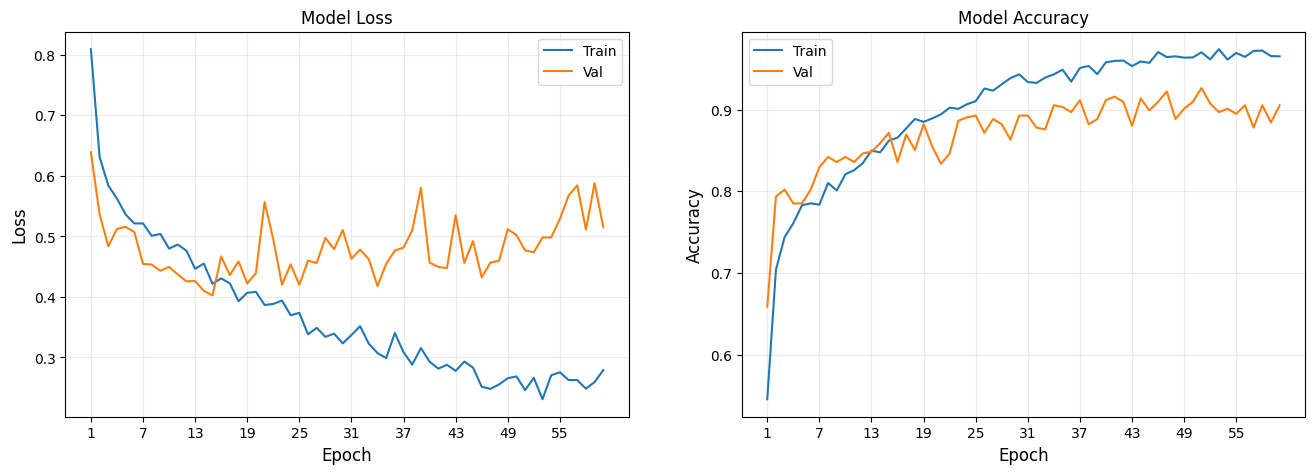

In [ ]:
performance_plot(hist)

In [ ]:
pickle_out = open("/content/drive/MyDrive/ML project/" + "history_model2_finale_v1.pickle","wb")
pickle.dump(hist, pickle_out)
pickle_out.close()
model2.save("/content/drive/MyDrive/ML project/folder/model2v1")

#for Github upload
model2.save("/content/drive/MyDrive/ML project/folder/Model2_finale.h5")

In [2]:
model2=load_model("/content/drive/MyDrive/ML project/folder/model2v1")

### Evaluation of the model

In [ ]:
model2.evaluate(X_test,y_test,batch_size=64)

19/19 [==============================] - 0s 21ms/step - loss: 0.4995 - accuracy: 0.9120


[0.4994829297065735, 0.9119601249694824]

In [ ]:
# 0: chihuahuas, 1: muffin
val_predicts = model2.predict(X_test)
predictions = [1*(x[0]>=0.5) for x in val_predicts]
conf_matr = metrics.confusion_matrix(y_test, predictions)
print(conf_matr)

38/38 [==============================] - 20s 535ms/step
[[616  34]
 [ 72 482]]


In [ ]:
print("Misclassification rate for chihuahuas: " + str(round(conf_matr[0][1]/sum(conf_matr[0])*100, 3))+ "%")
print("Misclassification rate for muffins: " + str(round(conf_matr[1][0]/sum(conf_matr[1])*100, 3))+ "%")
print("Total misclassification: " + str(round((conf_matr[1][0]+conf_matr[0][1])/sum(sum(conf_matr))*100, 3))+ "%")

Misclassification rate for chihuahuas: 5.231%
Misclassification rate for muffins: 12.996%
Total misclassification: 8.804%


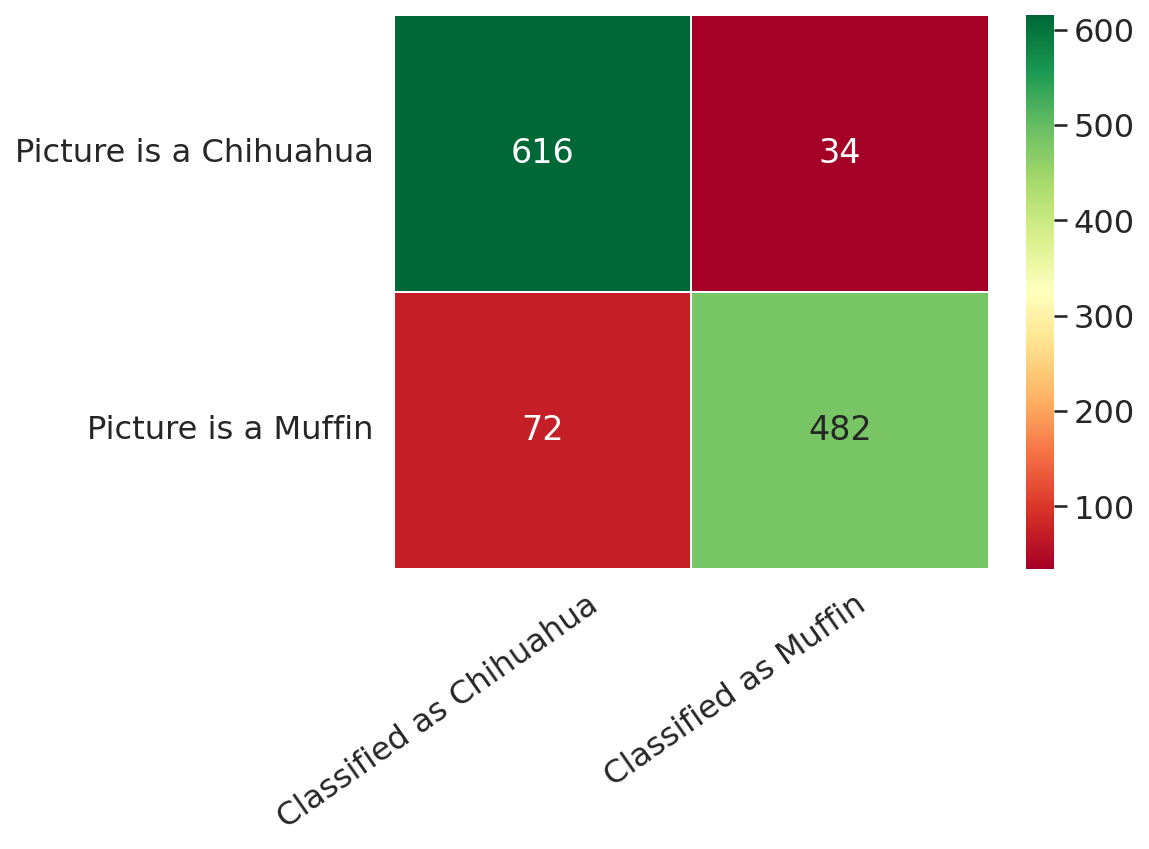

In [ ]:
df_cm=pd.DataFrame(conf_matr, ["Picture is a Chihuahua", "Picture is a Muffin"], ["Classified as Chihuahua", "Classified as Muffin"])
x=np.arange(2)
plt.figure(dpi=150)

sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={'size':16}, cmap="RdYlGn", linewidth=.9, linecolor='white', fmt='d')
plt.xticks(ticks=x+.15,labels=list(df_cm.columns), rotation=35, ha='center')
plt.show()

## 5-Fold Cross-Validation

In [ ]:
accuracy_list=[]
zero_one_loss_list=[]

k_fold=KFold(n_splits=5, shuffle=True, random_state=42)
index=1
for train_index,test_index in k_fold.split(X_train):
  #subset the training into training and validation
  X_train_cv, X_val_cv = X_train[train_index],X_train[test_index]
  y_train_cv, y_val_cv = y_train[train_index],y_train[test_index]

  print("\n Cycle nr: " + str(index))

  modelcv=Sequential()
  modelcv.add(Conv2D(64,(3,3),activation="relu", input_shape=(150,150,1)))
  modelcv.add(MaxPooling2D(2,2))


  modelcv.add(Conv2D(64,(3,3),activation="relu"))
  modelcv.add(MaxPooling2D(2,2))

  modelcv.add(Conv2D(128,(3,3),activation="relu"))
  modelcv.add(MaxPooling2D(2,2))

  modelcv.add(Flatten())

  modelcv.add(Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)))
  modelcv.add(Dropout(0.6))

  modelcv.add(Dense(64, activation="relu"))

  modelcv.add(Dense(1,activation="sigmoid")) #do not use softmax because it is just a binary classification

  modelcv.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(0.001), metrics=["accuracy"])
  monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=15, verbose=1, restore_best_weights=True)

  hist = modelcv.fit(
  x=X_train_cv,
  y=y_train_cv,
  epochs=60,
  batch_size=64,
  validation_data=(X_val_cv, y_val_cv),
  shuffle=True,
  callbacks=[monitor]
  )

  loss,accuracy = modelcv.evaluate(X_val_cv,y_val_cv)
  zero_one_loss = 1-accuracy
  zero_one_loss_list.append(zero_one_loss)
  accuracy_list.append(accuracy)

  index+=1

print('0-1 Losses:',zero_one_loss_list)
avg_loss = np.mean(zero_one_loss_list)
print("Zero-One Loss: {}".format(avg_loss))
print('Accuracies:',accuracy_list)
avg_acc = np.mean(accuracy_list)
print("AVG Accuracy: {}".format(avg_acc))


 Cycle nr: 1
Epoch 1/60
60/60 [==============================] - 6s 68ms/step - loss: 0.8305 - accuracy: 0.5575 - val_loss: 0.6646 - val_accuracy: 0.6976
Epoch 2/60
60/60 [==============================] - 4s 59ms/step - loss: 0.6561 - accuracy: 0.6671 - val_loss: 0.6575 - val_accuracy: 0.6112
Epoch 3/60
60/60 [==============================] - 3s 58ms/step - loss: 0.6008 - accuracy: 0.7348 - val_loss: 0.5339 - val_accuracy: 0.7945
Epoch 4/60
60/60 [==============================] - 3s 58ms/step - loss: 0.5579 - accuracy: 0.7688 - val_loss: 0.4797 - val_accuracy: 0.8145
Epoch 5/60
60/60 [==============================] - 4s 61ms/step - loss: 0.5470 - accuracy: 0.7707 - val_loss: 0.4967 - val_accuracy: 0.7987
Epoch 6/60
60/60 [==============================] - 3s 58ms/step - loss: 0.5234 - accuracy: 0.7831 - val_loss: 0.5498 - val_accuracy: 0.7682
Epoch 7/60
60/60 [==============================] - 3s 58ms/step - loss: 0.5159 - accuracy: 0.7939 - val_loss: 0.4451 - val_accuracy: 0.8346

Average loss: **0.1047**

# Keras auto tuner

As you can notice, I obtained a sub-optimal solution.

In [ ]:
def model_builder(hp):
  model = Sequential()

  filters_layer_1 = hp.Choice('layer_1', values=[32,64,128])


  filters_layer_2 = hp.Choice('layer_2', values=[32,64,128])


  filters_layer_3 = hp.Choice('layer_3', values=[32,64,128])



  drop_amount_1=hp.Float('dropout_1', min_value=0.4, max_value=0.7, step=0.1)


  nodes_layer_6 = hp.Choice('layer_6', values=[32,64,128])
  nodes_layer_7 = hp.Choice('layer_7', values=[32,64,128])

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
  lambda_reg = hp.Choice('lambda', values=[0.1,0.01,0.001,0.0001,0.00001])


  model.add(Conv2D(filters_layer_1, (3,3), input_shape=(150,150,1), activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(filters_layer_2,(3,3),activation="relu"))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(filters_layer_3,(3,3),activation="relu"))
  model.add(MaxPooling2D(2,2))


  model.add(Flatten())

  model.add(Dense(nodes_layer_6, activation="relu", kernel_regularizer=regularizers.l2(lambda_reg)))
  model.add(Dropout(drop_amount_1))

  model.add(Dense(nodes_layer_7, activation="relu"))


  model.add(Dense(1,activation="sigmoid"))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='binary_crossentropy',
                metrics=['accuracy'])

  return model

In [ ]:
#TEST NR 1

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='dir',
                     project_name='x')

In [ ]:
tuner.search(X_train, y_train, epochs=40, validation_split=0.1)

Trial 30 Complete [00h 00m 57s]
val_accuracy: 0.8505263328552246

Best val_accuracy So Far: 0.8884210586547852
Total elapsed time: 00h 13m 51s


In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
model3 = tuner.hypermodel.build(best_hps)
monitor=EarlyStopping(monitor='val_accuracy', min_delta= 1e-3, patience=10, verbose=1, restore_best_weights=True)
history3 = model3.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=32,
                      callbacks=[monitor])

Epoch 1/50
134/134 [==============================] - 7s 29ms/step - loss: 0.7078 - accuracy: 0.5337 - val_loss: 0.6943 - val_accuracy: 0.5326
Epoch 2/50
134/134 [==============================] - 3s 26ms/step - loss: 0.6420 - accuracy: 0.6553 - val_loss: 0.4926 - val_accuracy: 0.7958
Epoch 3/50
134/134 [==============================] - 4s 27ms/step - loss: 0.5334 - accuracy: 0.7441 - val_loss: 0.4418 - val_accuracy: 0.8126
Epoch 4/50
134/134 [==============================] - 4s 27ms/step - loss: 0.4853 - accuracy: 0.7791 - val_loss: 0.4325 - val_accuracy: 0.8126
Epoch 5/50
134/134 [==============================] - 3s 26ms/step - loss: 0.4684 - accuracy: 0.7915 - val_loss: 0.4199 - val_accuracy: 0.8189
Epoch 6/50
134/134 [==============================] - 3s 26ms/step - loss: 0.4363 - accuracy: 0.8081 - val_loss: 0.4436 - val_accuracy: 0.8189
Epoch 7/50
134/134 [==============================] - 4s 28ms/step - loss: 0.4105 - accuracy: 0.8247 - val_loss: 0.3910 - val_accuracy: 0.8337

As expected, the validation accuracy is way lower than the one obtained by the manually fine-tuned model.

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 64)       